In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# Base.metadata.drop_all(engine)

In [8]:
# Base.metadata.create_all(engine)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
station= Base.classes.station
measurement= Base.classes.measurement

# print(station)
# print(measurement)

In [22]:
# Create our session (link) from Python to the DB
session=Session(engine)
# print(session)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

# mostrecentd= session.query(measurement.date).order_by(measurement.date).last()
# mostrecentd

mostrecentd= session.query(func.max(measurement.date)).first()
mostrecentd


('2017-08-23')

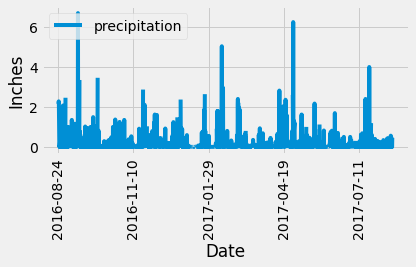

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year=dt.date(2017,8,23)-dt.timedelta(days=365)
# previous_year

# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date,measurement.prcp).filter(measurement.date>previous_year).all()
# results
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=["date","precipitation"])
# df.set_index("date",inplace=True)


# df=df.set_index

# Sort the dataframe by date
df=df.sort_values("date")
df.head()
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x="date",y="precipitation",rot=90)
plt.ylabel("Inches")
plt.xlabel("Date")

plt.tight_layout()
plt.show()



# df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
# df.set_index('stock', inplace=True)
# df.plot.bar()
# plt.tight_layout()
# plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
totalstations=session.query(func.count(station.station)).all()
totalstations

[(9)]

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
var=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
var

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
newdb= session.query(measurement.station, func.min(measurement.tobs),func.max(measurement.tobs),\
                     func.avg(measurement.tobs),func.count(measurement.tobs)).filter(measurement.station=="USC00519281").all()
newdb

[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# previous_year=dt.date(2017,8,23)-dt.timedelta(days=365)
# previous_year

# Perform a query to retrieve the data and precipitation scores
resultstob=session.query(measurement.date,measurement.tobs).filter(measurement.station=="USC00519281").filter(measurement.date>previous_year).all()
resultstob


# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(resultstob,columns=["date","temp. observations"])
df.set_index("date",inplace=True)
df


# Sort the dataframe by date
df=df.sort_values("date")
df.head()
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x="date",y="temp. observations",rot=90)
# plt.ylabel("Temp. Ferenh.")
# plt.xlabel("Date")

# plt.tight_layout()
# plt.show()



KeyError: 'date'

# Close session

In [ ]:
# Close Session
session.close()